In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def generate_data(n):
    t = np.linspace(0,2*np.pi,n)
    # x = np.linspace(-np.pi,np.pi,n)
    # y = np.sin(x)
    # x = np.sqrt(t)*np.cos(t)
    # y = np.sqrt(t)*np.sin(t)
    x = t*np.cos(t)
    y = t*np.sin(t)
    dist = np.random.randn(n)
    dist = dist / max(dist)
    intensity = 1 / np.power(dist,2)
    intensity = intensity / max(intensity)
    th = np.random.rand(n)
    x = x + dist*np.cos(th)
    y = y + dist*np.sin(th)
    return x, y, intensity, np.abs(dist)

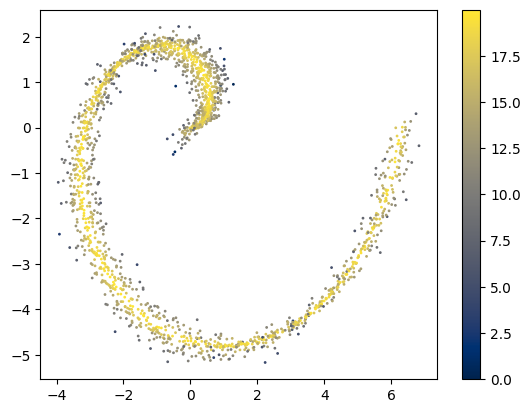

In [ ]:
N = 2000
x, y, z, d = generate_data(N)
cm = matplotlib.colormaps['cividis']
sc = plt.scatter(x,y,s=1,c=20*(1-d),cmap=cm)
plt.colorbar(sc)
plt.show()

In [ ]:
def train_som(input,weights,max_epochs,learn_rate,learn_rate_progression,neighborhood_radius):
    for k in range(max_epochs):
        for j in np.random.permutation(input.shape[1]):
            winner = find_winner(input[:,j],weights)
            weights = update_weights(input[:,j],weights,winner,learn_rate,neighborhood_radius)
        learn_rate *= learn_rate_progression
        if k in [0.1, 0.3, 0.5, 0.7]*max_epochs:
            neighborhood_radius -= 1
        make_plot(weights,k+1)
    return weights

In [ ]:
def find_winner(input, weights):
    row = weights.shape[1]
    col = weights.shape[2]
    dist = np.ones((row,col))
    for i in range(row):
        for j in range(col):
            dist[i][j] = np.linalg.norm(input - weights[:,i,j])
    J = np.argwhere(((dist == np.min(dist)) * (np.ones_like(dist))) != 0)
    winner = J[np.random.randint(len(J))]
    return winner

def update_weights(input,weights,winner,learn_rate,neighborhood_radius):
    row_size = weights.shape[1]
    col_size = weights.shape[2]

    #Works for max. R=3
    if (neighborhood_radius == 0):
        neighborhood = [(0,0)]
    elif (neighborhood_radius == 1):
        neighborhood = [(-1,0), (0,-1), (0,0), (0,1), (1,0)]
    elif (neighborhood_radius == 2):
        neighborhood = [(-1,0), (0,-1), (0,0), (0,1), (1,0),
                        (-2,0), (-1,-1), (-1,1), (0,-2), (0,2), (1,-1), (1,1), (2,0)]
    elif (neighborhood_radius == 3):
        neighborhood = [(-1,0), (0,-1), (0,0), (0,1), (1,0),
                        (-2,0), (-1,-1), (-1,1), (0,-2), (0,2), (1,-1), (1,1), (2,0),
                        (-3,0), (-2,-1), (-2,1), (-1,-2), (-1,2), (0,-3), (0,3), (1,-2), (1,2), (2,-1), (2,1), (3,0)]

    x_w, y_w = winner
    idx = []
    for (i,j) in neighborhood:
        idx.append((x_w+i,y_w+j))

    for (i,j) in idx:
        if (((i >= 0) and (i <= row_size-1))) and (((j >= 0) and (j <= col_size-1))):
            weights[:,i,j] = weights[:,i,j] + learn_rate*(input - weights[:,i,j])
    return weights

def make_plot(weights,epoch):
    sc = plt.scatter(x,y,s=1,c=20*(1-d),cmap=cm)
    row_size = weights.shape[1]
    col_size = weights.shape[2]
    for i in range(row_size):
        for j in range(col_size):
            plt.plot(weights[0][i],weights[0][j], 'ks-')
    plt.colorbar(sc)
    plt.title('Epoch = ' + str(epoch))
    plt.show()

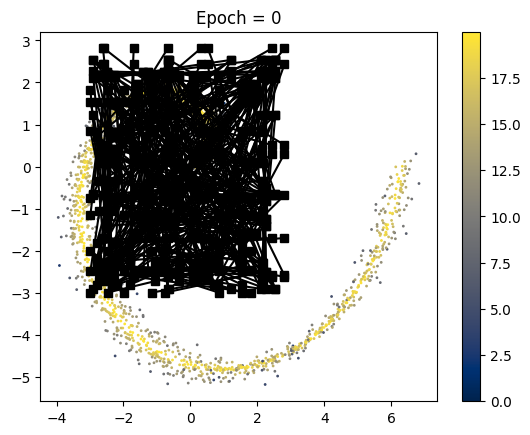

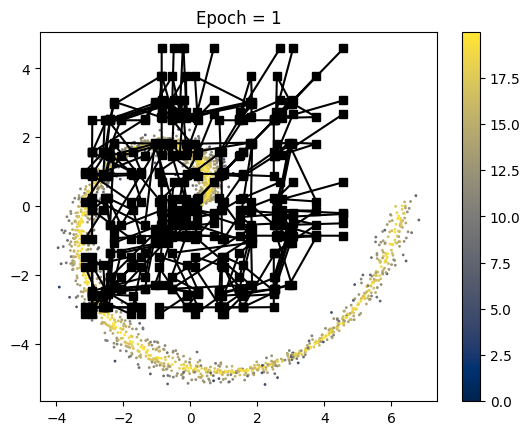

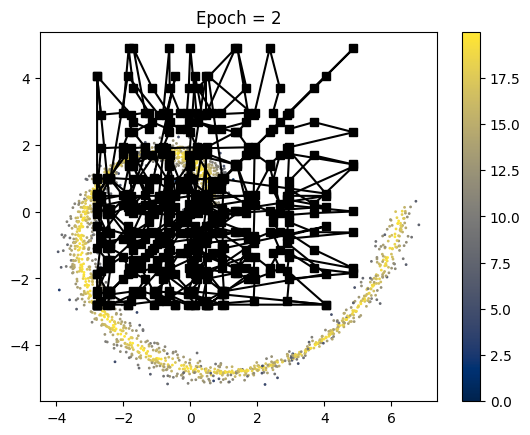

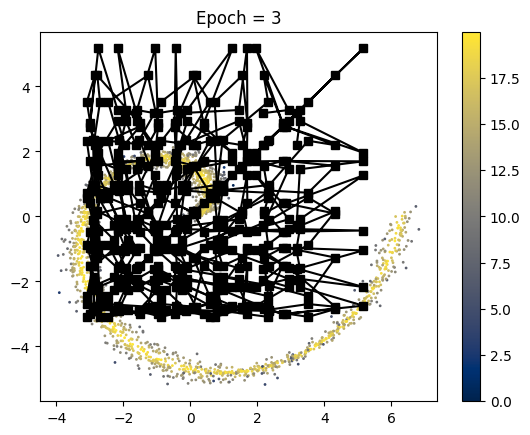

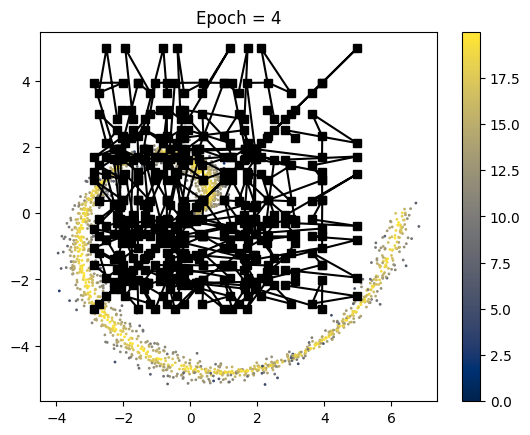

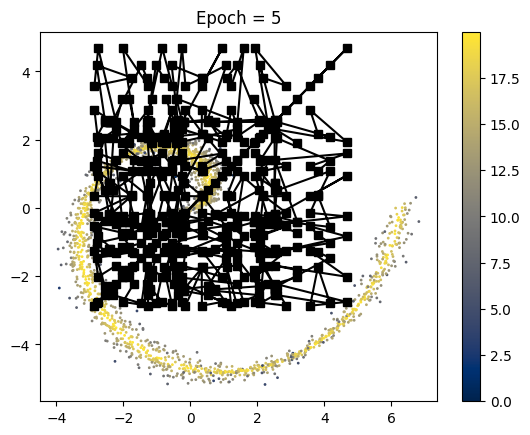

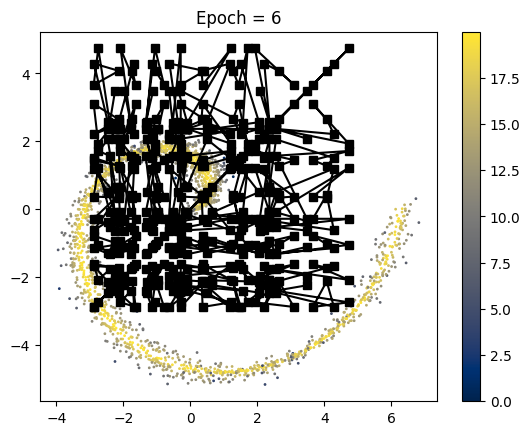

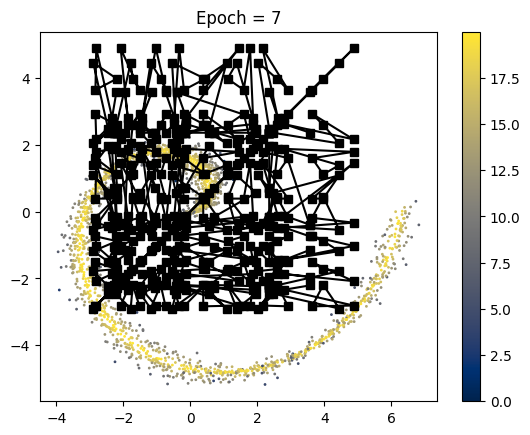

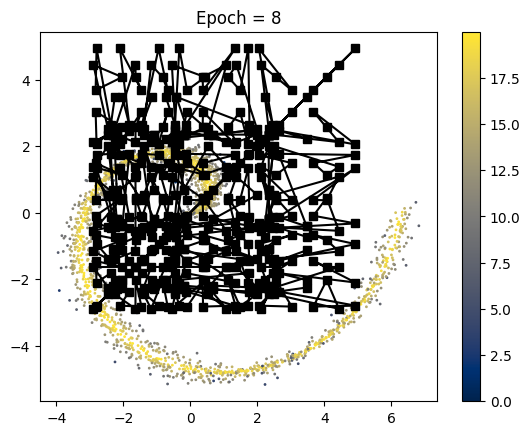

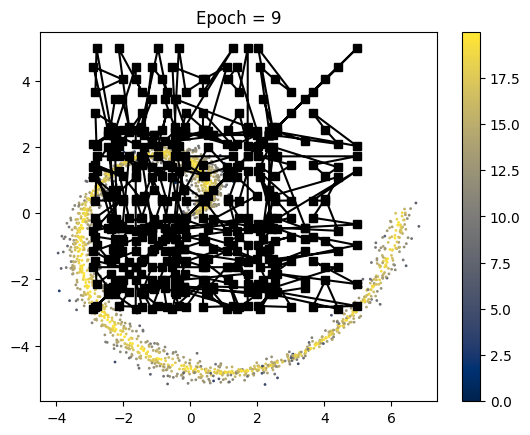

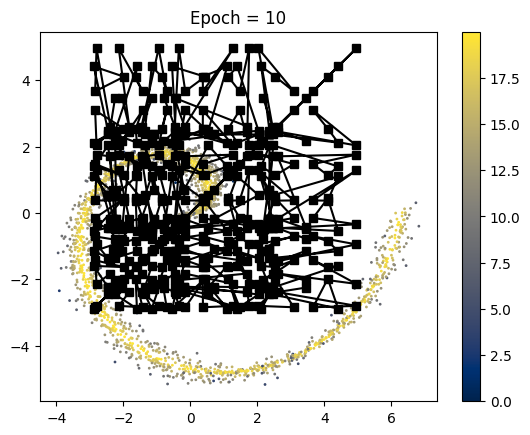

In [ ]:
# Works for full square cluster no. (ex. 6^2, 10^2)
clusters = 64
weights = (2*np.random.rand(3,int(np.sqrt(64)),int(np.sqrt(64)))-1)*3
input = np.append(x,y,axis=0)
input = np.append(input,z,axis=0)
input = np.reshape(input,(3,N))
learn_rate = 0.4
learn_rate_progression = 0.5
neighborhood_radius = 3
max_epochs = 10
epoch = 0
make_plot(weights,epoch)
weights = train_som(input,weights,max_epochs,learn_rate,learn_rate_progression,neighborhood_radius)